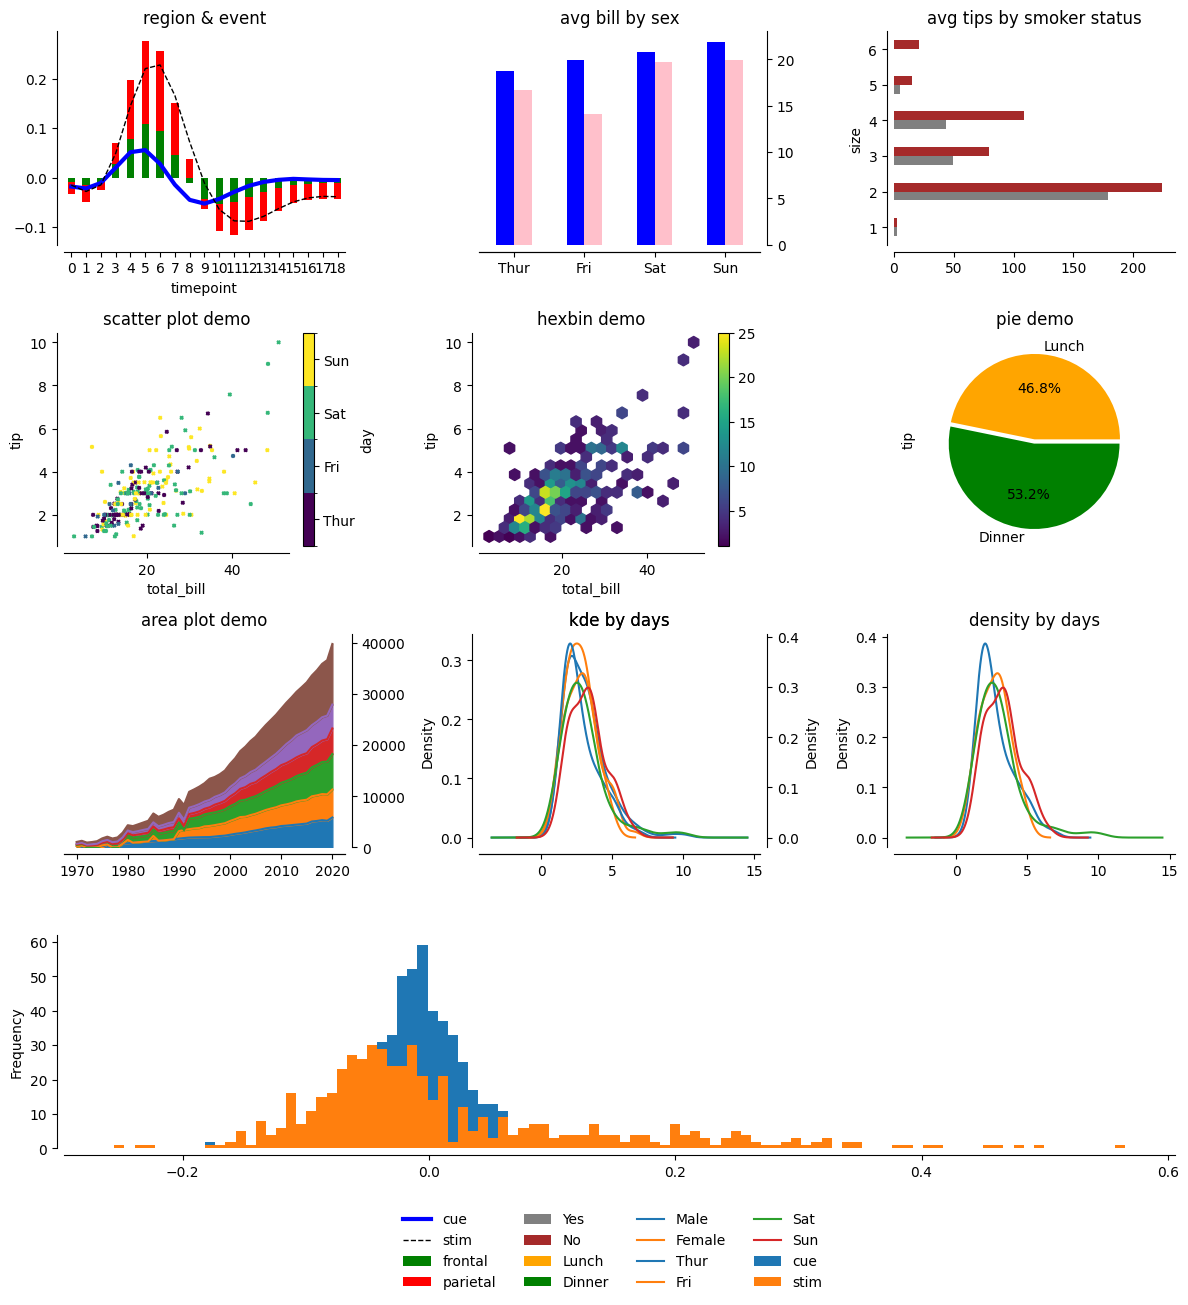

In [1]:
import numpy as np
import pandas as pd
import pytae as pt

fmri = pt.sample_data['fmri']
tips = pt.sample_data['tips']
healthexp = pt.sample_data['healthexp']


color={'cue': 'blue', 'stim': 'black', 'parietal': 'red',
       'frontal': 'green','Male':'blue','Female':'pink','Dinner':'green',
       'Lunch':'orange','Yes':'grey','No':'brown'}

style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}
marker = {'Male': 'o', 'Female': 'x'}
size={'Male': 10,'Female': 20}

mosaic = """
ABC
DEF
GHI
JJJ
"""
k = pt.Plotter(mosaic,figsize=(12, 12))

(k
.data(fmri)
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',color=color,style=style,width=width,
      on='A',title='region & event',kind='line')
.plot(x='timepoint', y='signal',by='region',kind='bar',stacked=True,on='A',color=color,aggfunc='mean')
.data(tips)
.plot(x='day',y='total_bill',by='sex',aggfunc='mean',on='B^',kind='bar',color=color,
      title='avg bill by sex',legend=False)
.plot(x='size',y='tip',by='smoker',on='C',kind='barh',color=color,title='avg tips by smoker status')
.data(tips)
.plot(kind='scatter',x='total_bill',y='tip',on='D',marker='x',s=5,c='day',cmap='viridis',title='scatter plot demo')
.data(tips)
.plot(kind='hexbin',x='total_bill',y='tip',on='E',C='size',reduce_C_function=np.sum,cmap="viridis",gridsize=20,title='hexbin demo')
.data(tips)
.plot(kind='pie',y='tip',by='time',on='F',aggfunc='mean', autopct='%1.1f%%',colors=color,explode=(0,0.05),title='pie demo') #for pie matplotlib says colors and not color
.data(healthexp)
.plot(kind='area',x='Year',y='Spending_USD',aggfunc='mean',on='G^',legend=False, by="Country",title='area plot demo')
.data(tips)

.plot(kind='kde',on='H^',by='day',column='tip',title='kde by days')# ,secondary_y=True)
 .plot(kind='kde',column='tip',on='H', by="sex")
.plot(kind='density',on='I',by='day',column='tip',title='density by days' )
.data(fmri)
.plot(kind='hist',column='signal',by='event',on='J',bins=100)
.finalize(consolidate_legends=True,ncols=4, bbox_to_anchor=(0.7, -0.005)) 
# .finalize()

)



k.fig


    

In [2]:
# k.get_plot_elements()

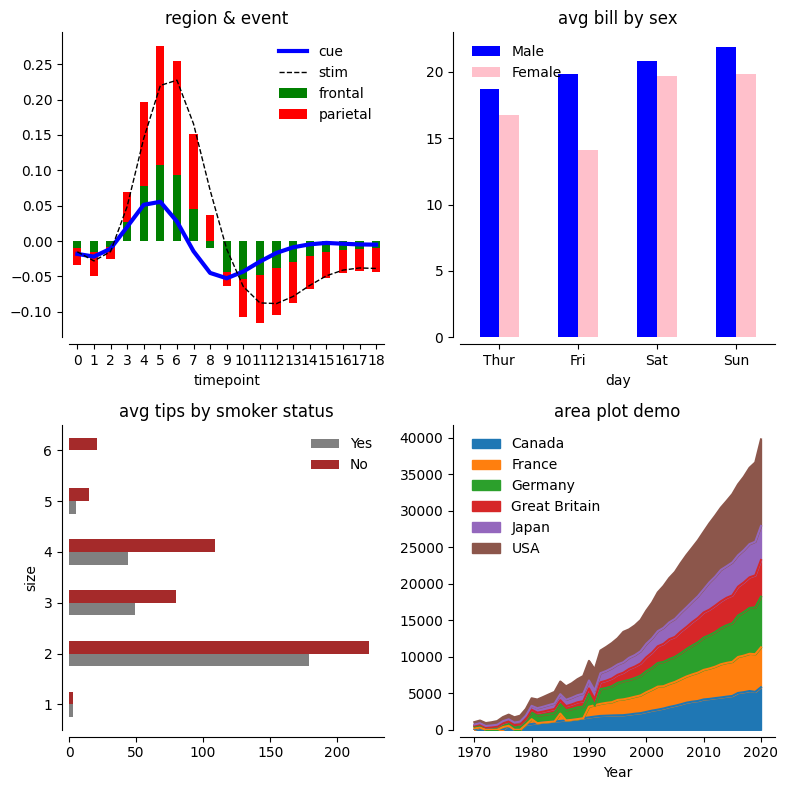

In [17]:
mosaic = """
AB
CD
"""
k = pt.Plotter(mosaic,figsize=(8,8))

(k
.data(fmri)
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',color=color,style=style,width=width,
      on='A',title='region & event',kind='line')
.plot(x='timepoint', y='signal',by='region',kind='bar',stacked=True,on='A',color=color,aggfunc='mean')
.data(tips)
.plot(x='day',y='total_bill',by='sex',aggfunc='mean',on='B',kind='bar',color=color,
      title='avg bill by sex',secondary_y=True)
.plot(x='size',y='tip',by='smoker',on='C',kind='barh',color=color,title='avg tips by smoker status')
.data(healthexp)
.plot(kind='area',x='Year',y='Spending_USD',aggfunc='mean',on='D', 
      by="Country",title='area plot demo',secondary_y=True,legend=False,clip_data=1)

# .finalize(consolidate_legends=True,ncols=2, bbox_to_anchor=(0.8, -0.005)) 
.finalize()
)

# Todo: remove (right label if consolidate_legend is not used)


k.fig

In [4]:
k.plot_kwargs_store['A']['kind']

'bar'

   timepoint       cue      stim
0          0 -0.018151 -0.015172
1          1 -0.021955 -0.028049
2          2 -0.010830 -0.014916
3          3  0.020084  0.048808
4          4  0.051290  0.145098
5          5  0.055489  0.219962
6          6  0.027651  0.227380
7          7 -0.014388  0.165708
8          8 -0.045020  0.071860
9          9 -0.052590 -0.011492
10        10 -0.043028 -0.064342
11        11 -0.028997 -0.087392
12        12 -0.016701 -0.088351
13        13 -0.008810 -0.078254
14        14 -0.004595 -0.062726
15        15 -0.002604 -0.049156
16        16 -0.003766 -0.041063
17        17 -0.004742 -0.037994
18        18 -0.005045 -0.038690


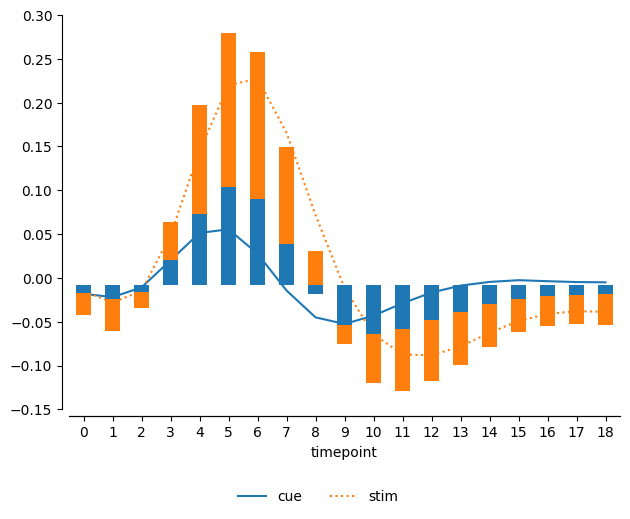

In [14]:
import numpy as np
import pandas as pd
import pytae as pt

fmri = pt.sample_data['fmri']

t = pt.Plotter() #if no mosaic is plotted it will automatically work on single subplot
(t
.data(fmri)
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',kind='line',style={'cue':'-','stim':':'},ylim=(-0.15,0.3),print_data=1)
.plot(x='timepoint', y='signal',by='region',kind='bar',stacked=True,aggfunc='mean',on='A^',legend=False,print_data=0) 
 #if legend is set as False it will not be p[art of consolidated legend
.finalize(consolidate_legends=True, bbox_to_anchor=(0.65, -0.005), hide_secondary_y=True)
)
t.fig


   scenario  Jump-off_surplus  scn1_surplus  scn2_surplus  scn3_surplus  \
0  Jump-off              21.0           NaN           NaN           NaN   
1      scn1               NaN          17.0           NaN           NaN   
2      scn2               NaN           NaN          11.0           NaN   
3      scn3               NaN           NaN           NaN          13.0   
4      scn4               NaN           NaN           NaN           NaN   

   scn4_surplus  Jump-off_depletion  scn1_depletion  scn2_depletion  \
0           NaN                 0.0             NaN             NaN   
1           NaN                 NaN             4.0             NaN   
2           NaN                 NaN             NaN            10.0   
3           NaN                 NaN             NaN             NaN   
4           9.0                 NaN             NaN             NaN   

   scn3_depletion  scn4_depletion  
0             NaN             NaN  
1             NaN             NaN  
2             

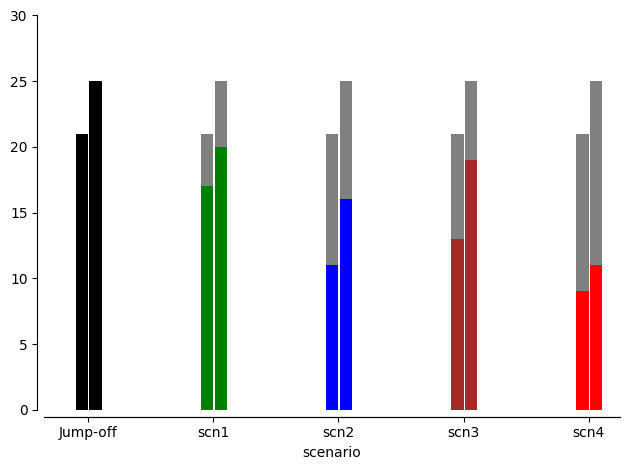

In [11]:

df = pd.DataFrame({
    'scenario': ['Jump-off', 'Jump-off', 'scn1', 'scn1', 'scn2', 'scn2', 'scn3', 'scn3', 'scn4', 'scn4'],
    'variable': ['depletion', 'surplus', 'depletion', 'surplus', 'depletion', 'surplus', 'depletion', 'surplus', 'depletion', 'surplus'],
    'last_cycle': [0, 25, 5, 20, 9, 16, 6, 19, 14, 11],
    'this_cycle': [0, 21, 4, 17, 10, 11, 8, 13, 12, 9]
})

variable_order = [ 'surplus','depletion']
df['scenario_variable'] = df['scenario'] + '_' + df['variable']
df['variable'] = pd.Categorical(df['variable'], categories=variable_order, ordered=True)


colors = {
    'Jump-off_surplus': 'black',    # Default for Jump-off
    'scn1_surplus': 'green',
    'scn2_surplus': 'blue',
    'scn3_surplus': 'brown',
    'scn4_surplus': 'red',
    'Jump-off_depletion': 'grey',
    'scn1_depletion': 'grey',
    'scn2_depletion': 'grey',
    'scn3_depletion': 'grey',
    'scn4_depletion': 'grey'
}
k = pt.Plotter()
(
    k
    .data(df)
    .plot(x='scenario', y='last_cycle', by='scenario_variable', aggfunc='sum', kind='bar', 
          width=0.1, position=-0.1, stacked=True, ylim=(0,30), color=colors, 
     hatch=None,legend=True)
    .plot(x='scenario', y='this_cycle', by='scenario_variable', aggfunc='sum', kind='bar',
          width=0.1, position=1, on='A^', stacked=True, hatch=None,)
    # .finalize(hide_secondary_y=True, legend_secondary=False)
# .finalize(consolidate_legends=True,ncols=2, bbox_to_anchor=(0.75, -0.005), hide_secondary_y=True) 
  .finalize(legend=False, hide_secondary_y=True)
)
## This is extreme  customization and hence not showing legends
k.fig